# Problem Statement

This project focuses in investigating the probability of predicting the type of breast cancer (malignant or benign) from the given characteristics of breast mass computed from digitized images. This project will examine the data available and attempt to predict the possibility that a breast cancer diagnosis is malignant or benign based on the attributes collected from the breast mass. To achieve this goal, the following steps are identified: •	Download the breast cancer images data from UCI repository •	Familiarize with the data by looking at its shape, the relations between variables, their possible correlations, and other attributes of the dataset

In [72]:
#Import all the libraries 

import numpy as np 
import pandas as pd 
import csv 
%matplotlib inline 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm 
from sklearn.neighbors import NearestNeighbors 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB  
from scipy import stats 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.grid_search import GridSearchCV  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics  

In [73]:
#load data
data = pd.read_csv("data.csv")

In [74]:
#check out the first two rows to make sure it loaded correctly
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])
print (malignant)

212


In [76]:
#Number of benign cases
benign = len(data[data['diagnosis']=='B'])
print (benign)

357


In [77]:
#how many cases are included in the dataset
length = len(data)
print (length)

569


In [78]:
#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100
print (rate)

37.258347978910365


In [79]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [80]:
#make diagnosis column numerical
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

In [81]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [82]:
#radius mean is the mean of distances from center to points on the perimeter of breast mass
#so let's look at maximum, minimum, average, and standard deviation of radius mean
min_radius = min(data['radius_mean'])
max_radius = max(data['radius_mean'])
average_radius = np.mean(data['radius_mean'])
sd_radius = np.std(data['radius_mean'])

print (min_radius)
print (max_radius)
print (average_radius)
print (sd_radius)

6.981
28.11
14.127291739894563
3.5209507607110626


In [83]:
#texture mean is the standard deviation of gray scale value
#so let's look at maximum, minimum, average, and standard deviation of texture mean
min_texture = min(data['texture_mean'])
max_texture = max(data['texture_mean'])
average_texture = np.mean(data['texture_mean'])
sd_texture = np.std(data['texture_mean'])

print (min_texture)
print (max_texture)
print (average_texture)
print (sd_texture)

9.71
39.28
19.28964850615117
4.297254637090421


In [90]:
def histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(" Distribution "+ var_name)

    plt.rcParams.update({'font.size': 6, 'font.weight':'bold'})
    plt.show()

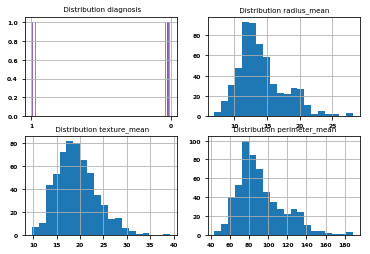

In [91]:
features=list(data.columns[1:5])
histograms(data,features,2,2)

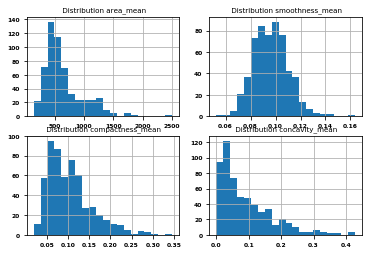

In [86]:
features1=list(data.columns[5:9])
histograms(data,features1,2,2)

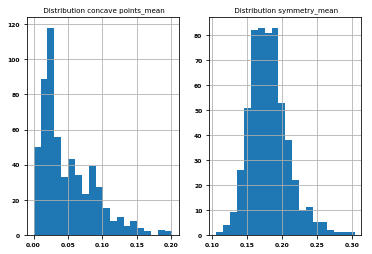

In [87]:
features2=list(data.columns[9:11])
histograms(data,features2,1,2)

I'm going to use various classifiers (K-neighbors, Decision trees, SVC, QDA, AdaBoost, Naïve Bayes, Random Forest, and MLP classifier) to predict the data with different sets of training samples. Once the best predicting model is identified, will reduce the training set in size to see what is the limit for this classifier to best predict these data. 

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [94]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [95]:
X.shape

(569, 31)

In [96]:
Y.shape

(569,)

In [130]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, make_scorer

models = []
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
models.append(( 'ADA' , AdaBoostClassifier()))

num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.921111 (0.041591) (run time: 0.088830)
SVM: 0.619614 (0.082882) (run time: 0.102567)
NB: 0.619565 (0.076432) (run time: 0.018773)
KNN: 0.749227 (0.035641) (run time: 0.021952)


## precision/recall scores:

In [142]:
#precision/recall scorers:

# Map dataframe to encode values and put values into a numpy array
encoded_labels = data['diagnosis'].map(lambda x: 1 if x == 'B' else 0).values 

# Continue as normal
X_train_raw, X_test_raw, y_train, y_test = train_test_split(data['diagnosis'], encoded_labels)



In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, make_scorer

models = []
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'RF' , RandomForestClassifier()))
models.append(( 'NB' , GaussianNB()))
models.append(( 'SVM' , SVC()))
models.append(( 'ADA' , AdaBoostClassifier()))


# Precision
precision_scorer = make_scorer(precision_score, pos_label='M')
precisions = cross_val_score(models, X_train, Y_train, cv=5, scoring=precision_scorer)
print ('Precision'), np.mean(precisions), precisions

# Recall
recall_scorer = make_scorer(recall_score, pos_label='B')
recalls = cross_val_score(models, X_train, Y_train, cv=5, scoring=recall_scorer)
print ('Recalls'), np.mean(recalls), recalls


# Test options and evaluation metric
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = SVC()
classifier.fit(X_train, Y_train)


precisions = cross_val_score(classifier, X_train, Y_train, cv=5, scoring='precision')
recalls = cross_val_score(classifier, X_train, Y_train, cv=5, scoring='recall')


print ('Precision'), np.mean(precisions), precisions
print ('Recalls'), np.mean(recalls), recalls

TypeError: estimator should be an estimator implementing 'fit' method, [('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('CART', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)), ('NB', GaussianNB(priors=None)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('ADA', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))] was passed

In [145]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7 
scoring =  'f1'
results = []
names = []
for name, model in models:
 kfold = KFold(n_splits= num_instances , random_state=seed)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
print('-> 10-Fold cross-validation accurcay score for the training data for six classifiers')

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:
/anaconda3/lib/python3.6/sit

ValueError: pos_label=1 is not a valid label: array(['0', '1'], dtype='<U1')

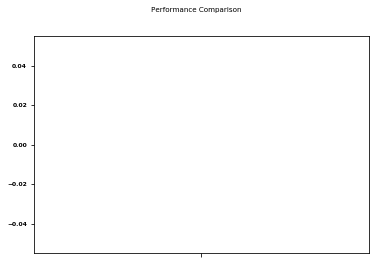

In [113]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Standardize the dataset
pipelines = []

pipelines.append(( 'ScaledFR' , Pipeline([( 'Scaler' , StandardScaler()),( 'FR' ,
    RandomForestClassifier())])))
pipelines.append(( 'ScaledKNN' , Pipeline([( 'Scaler' , StandardScaler()),( 'KNN' ,
    KNeighborsClassifier())])))
pipelines.append(( 'ScaledCART' , Pipeline([( 'Scaler' , StandardScaler()),( 'CART' ,
    DecisionTreeClassifier())])))
pipelines.append(( 'ScaledNB' , Pipeline([( 'Scaler' , StandardScaler()),( 'NB' ,
    GaussianNB())])))
pipelines.append(( 'ScaledSVM' , Pipeline([( 'Scaler' , StandardScaler()),( 'SVM' , SVC())])))
pipelines.append(( 'ScaledADA' , Pipeline([( 'Scaler' , StandardScaler()),( 'ADA' , AdaBoostClassifier())])))

results = []
names = []
for name, model in models:
 kfold = KFold(n_splits= num_instances , random_state=seed)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
print('-> 10-Fold cross-validation accurcay score for the training data for six classifiers')  

NameError: name 'num_instances' is not defined

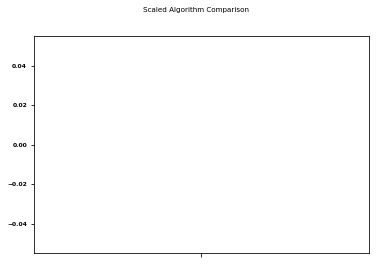

In [126]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()